In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

# Find closes current centroid for each data in the dataset
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example . *(Note: The index range 0 to K-1 varies slightly from what is shown in the lectures (i.e. 1 to K) because Python list indices start at 0 instead of 1)*
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm

In [2]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    m = X.shape[0]
    
    for i in range(m):
        distance = [] # distance between X[i] and each centroids[j]
        for j in range(K):
            # X[i] has n elements and centroids[j] has n elements
            # first the element-wise subtraction is performed
            # and then the norm (vector-sum) is done with linalg.norm
            norm = np.linalg.norm(X[i] - centroids[j])**2
            distance.append(norm)
        idx[i] = np.argmin(distance, axis=0)
    
    
    return idx

In [3]:
# Load an example dataset
X = load_data(os.path.join("data","data.npy"))

In [4]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [5]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


# Recompute Centroids
* For every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

where 
* $C_k$ is the set of examples that are assigned to centroid $k$
* $|C_k|$ is the number of examples in the set $C_k$


In [6]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        # points assigned to centroid k
        points = X[idx == k]
        
        # recompute the mean for centroid k
        centroids[k] = np.mean(points, axis=0)
    
    
    return centroids

In [7]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


# Run K-means

In [8]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


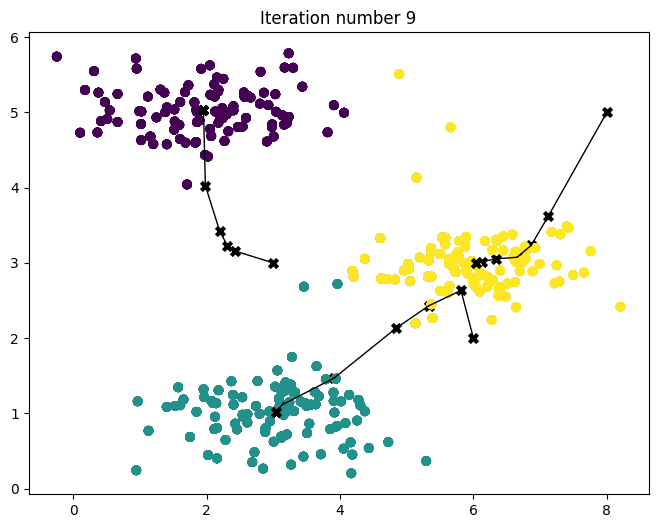

In [9]:
# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# Run K-means with random centroids init
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
* This allows the examples to be selected at random without the risk of selecting the same example twice.

In [10]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/49
K-Means iteration 1/49
K-Means iteration 2/49
K-Means iteration 3/49
K-Means iteration 4/49
K-Means iteration 5/49
K-Means iteration 6/49
K-Means iteration 7/49
K-Means iteration 8/49
K-Means iteration 9/49
K-Means iteration 10/49
K-Means iteration 11/49
K-Means iteration 12/49
K-Means iteration 13/49
K-Means iteration 14/49
K-Means iteration 15/49
K-Means iteration 16/49
K-Means iteration 17/49
K-Means iteration 18/49
K-Means iteration 19/49
K-Means iteration 20/49
K-Means iteration 21/49
K-Means iteration 22/49
K-Means iteration 23/49
K-Means iteration 24/49
K-Means iteration 25/49
K-Means iteration 26/49
K-Means iteration 27/49
K-Means iteration 28/49
K-Means iteration 29/49
K-Means iteration 30/49
K-Means iteration 31/49
K-Means iteration 32/49
K-Means iteration 33/49
K-Means iteration 34/49
K-Means iteration 35/49
K-Means iteration 36/49
K-Means iteration 37/49
K-Means iteration 38/49
K-Means iteration 39/49
K-Means iteration 40/49
K-Means iteration 41/49
K-

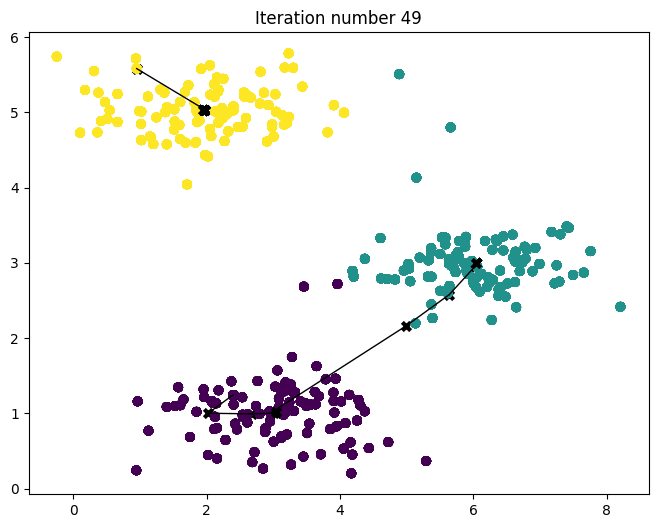

In [11]:
# Set number of centroids and max number of iterations
K = 3
max_iters = 50

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# Image compression
* In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).


In [12]:
# Load an image of a bird
original_img = plt.imread(os.path.join('img','bird_small.png'))

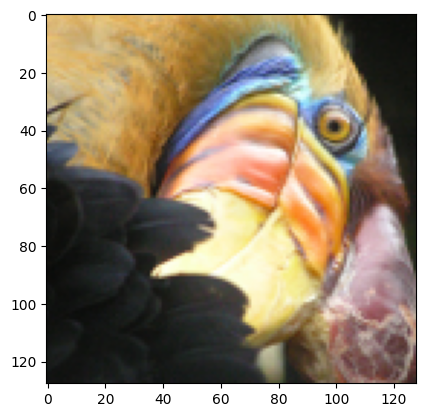

In [13]:
# Visualizing the image
plt.imshow(original_img)

In [14]:
# `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [15]:
# To call the `run_kMeans`, we need to transform the 3-d matrix in a 2-d matrix by flattening the first 2 dimensions 128 by 128 into a 16384 vector.
# The code below reshapes the matrix `original_img` to create an m by 3 matrix of pixel colors (m = 16384 = 128 * 128)
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [16]:
K = 16
max_iters = 30

# initialize the centroids randomly
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/29
K-Means iteration 1/29
K-Means iteration 2/29
K-Means iteration 3/29
K-Means iteration 4/29
K-Means iteration 5/29
K-Means iteration 6/29
K-Means iteration 7/29
K-Means iteration 8/29
K-Means iteration 9/29
K-Means iteration 10/29
K-Means iteration 11/29
K-Means iteration 12/29
K-Means iteration 13/29
K-Means iteration 14/29
K-Means iteration 15/29
K-Means iteration 16/29
K-Means iteration 17/29
K-Means iteration 18/29
K-Means iteration 19/29
K-Means iteration 20/29
K-Means iteration 21/29
K-Means iteration 22/29
K-Means iteration 23/29
K-Means iteration 24/29
K-Means iteration 25/29
K-Means iteration 26/29
K-Means iteration 27/29
K-Means iteration 28/29
K-Means iteration 29/29


<Figure size 800x600 with 0 Axes>

In [17]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [4 4 4 4 4]


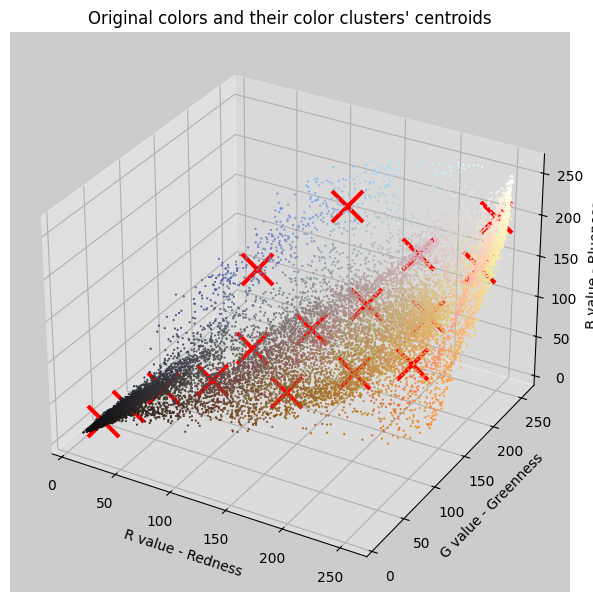

In [18]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

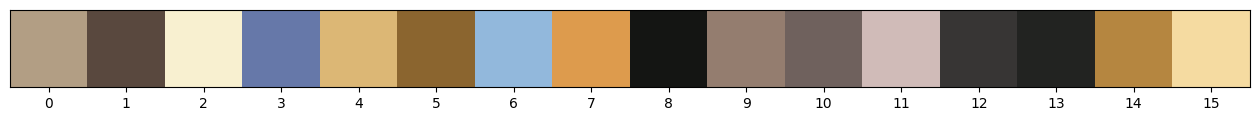

In [19]:
# Visualize the 16 colors selected by k-means
show_centroid_colors(centroids)

In [20]:
## now compress the image with the centroids found
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

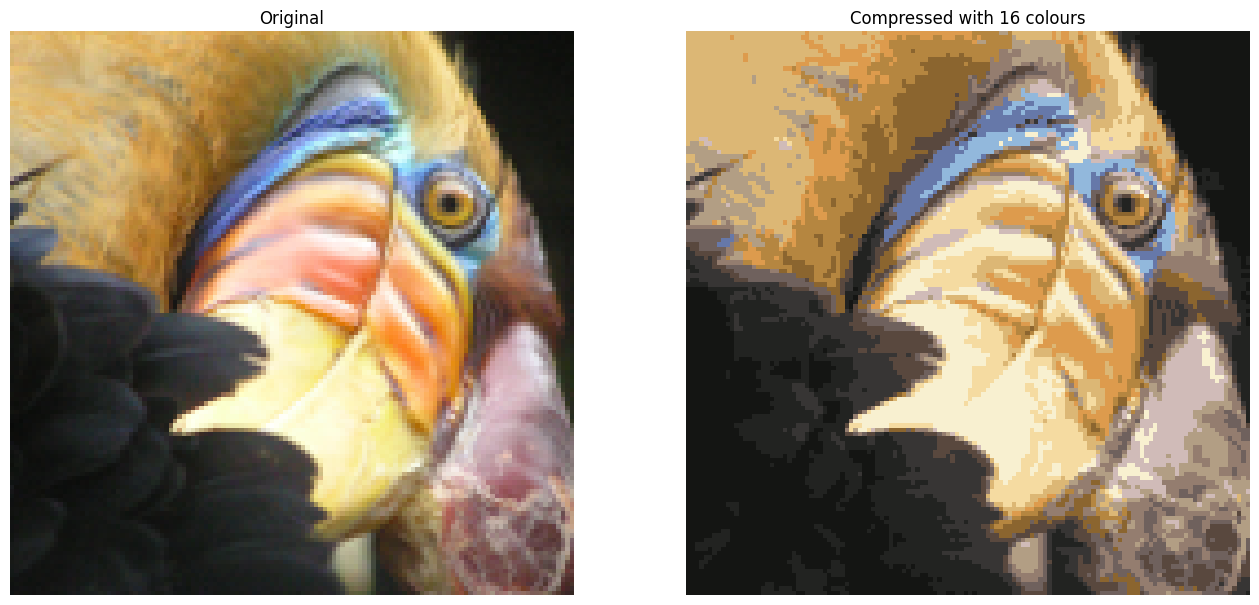

In [21]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()